In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1072,2020-07-21,United Kingdom,295860.0,295372.0,45397.0,45312.0,488.0,85.0
1073,2020-07-21,Germany,202126.0,202345.0,9096.0,9090.0,-219.0,6.0
1074,2020-07-21,Iran,277267.0,276202.0,14358.0,14405.0,1065.0,-47.0
1075,2020-07-21,Turkey,220526.0,220572.0,5507.0,5508.0,-46.0,-1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3234.0817084493965
RMSE =  8579.388177189165


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  295.585886722377
RMSE =  690.4494949717742


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  17082.125
RMSE =  23825.035866669263
-- World performances for deaths --
MAE =  1559.5576923076924
RMSE =  1893.057838727922


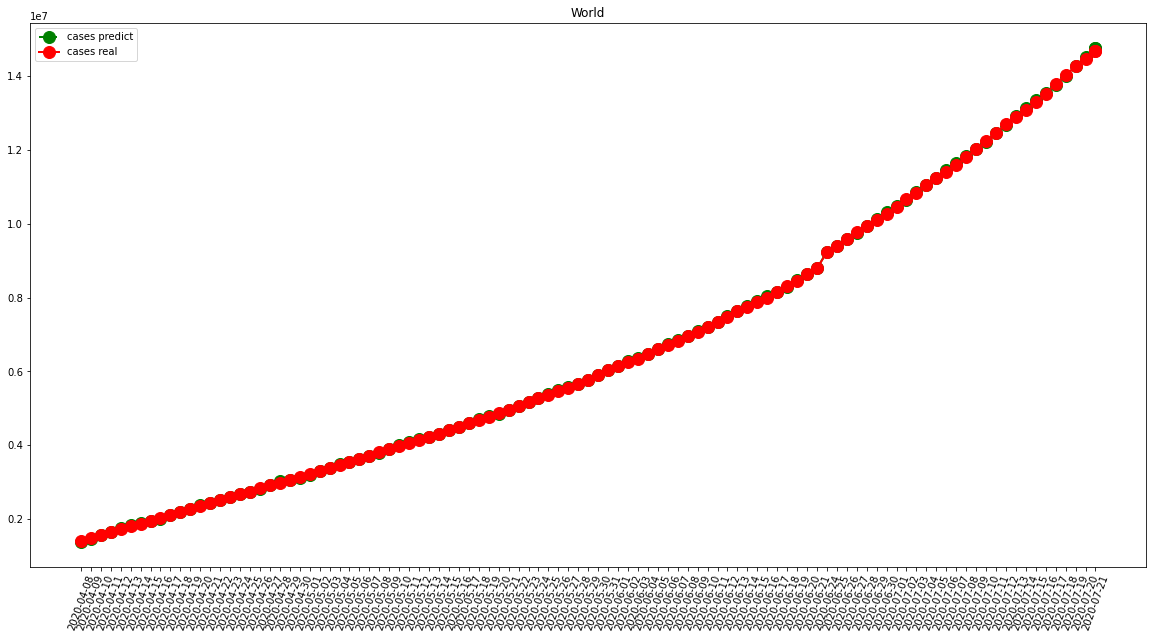

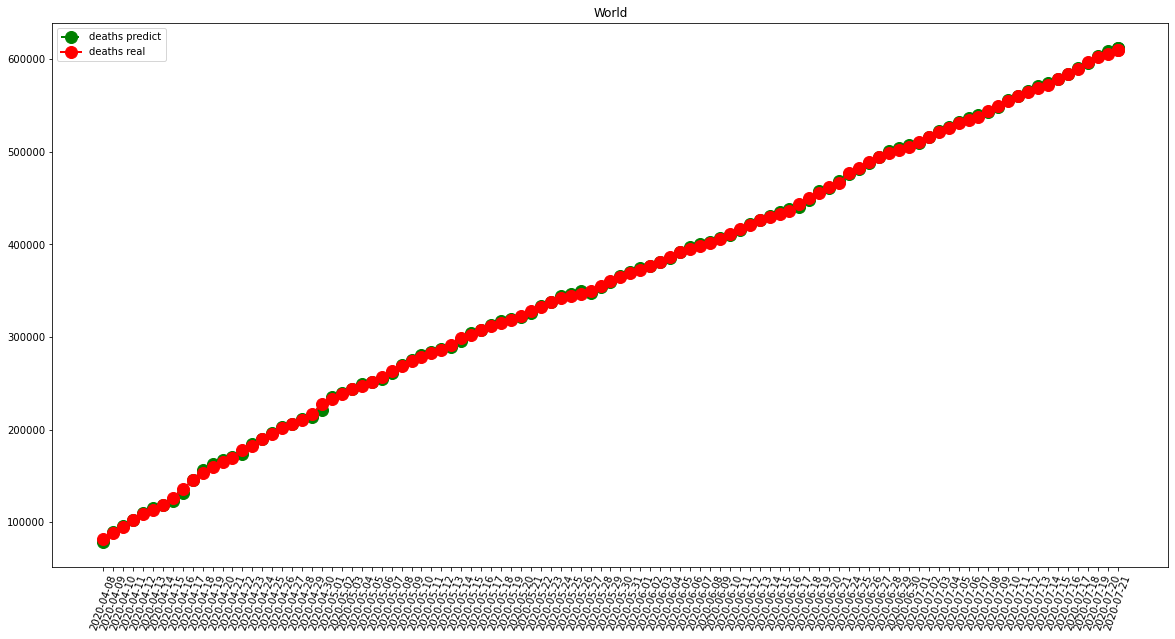

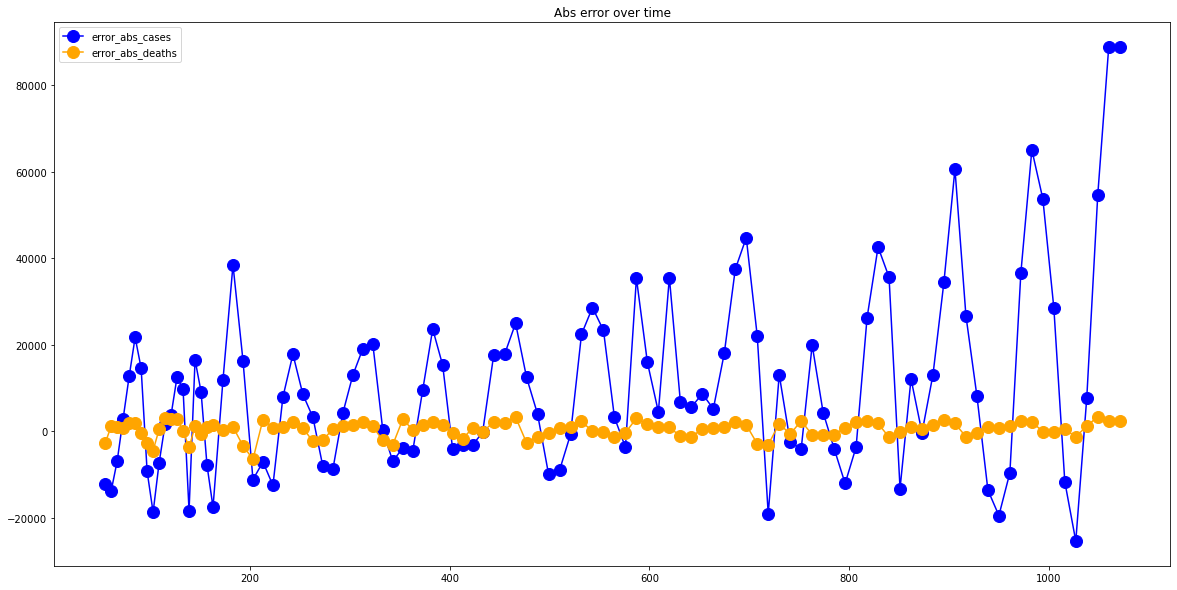

In [7]:
visShow("World")

-- France performances for cases --
MAE =  856.078947368421
RMSE =  1393.7706807528689
-- France performances for deaths --
MAE =  157.47368421052633
RMSE =  313.8734799302241


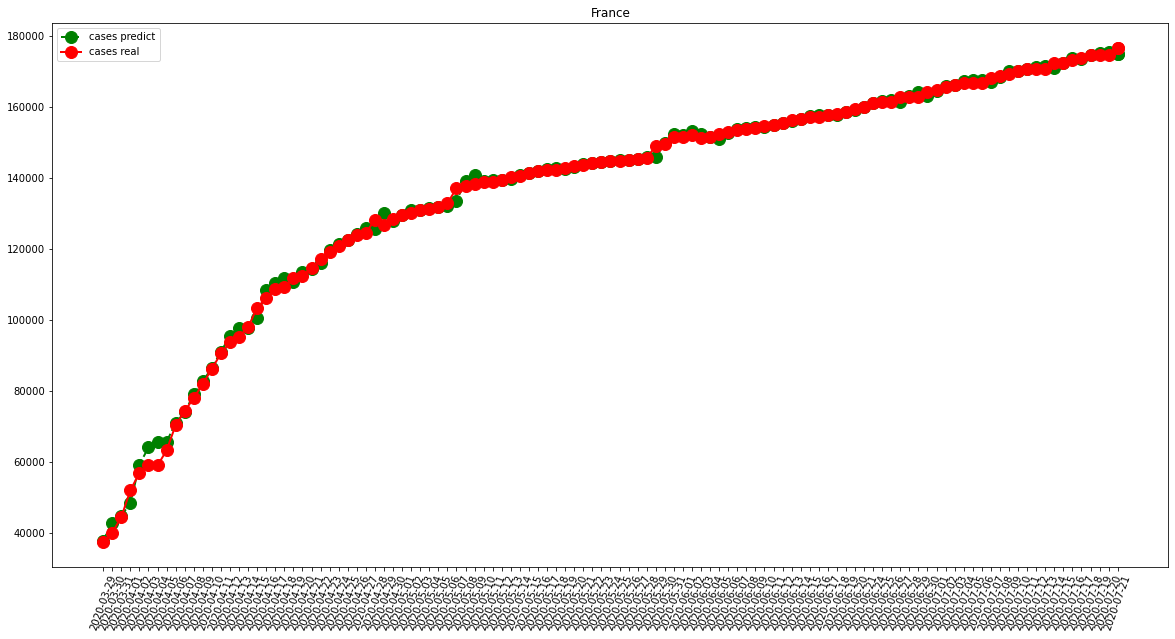

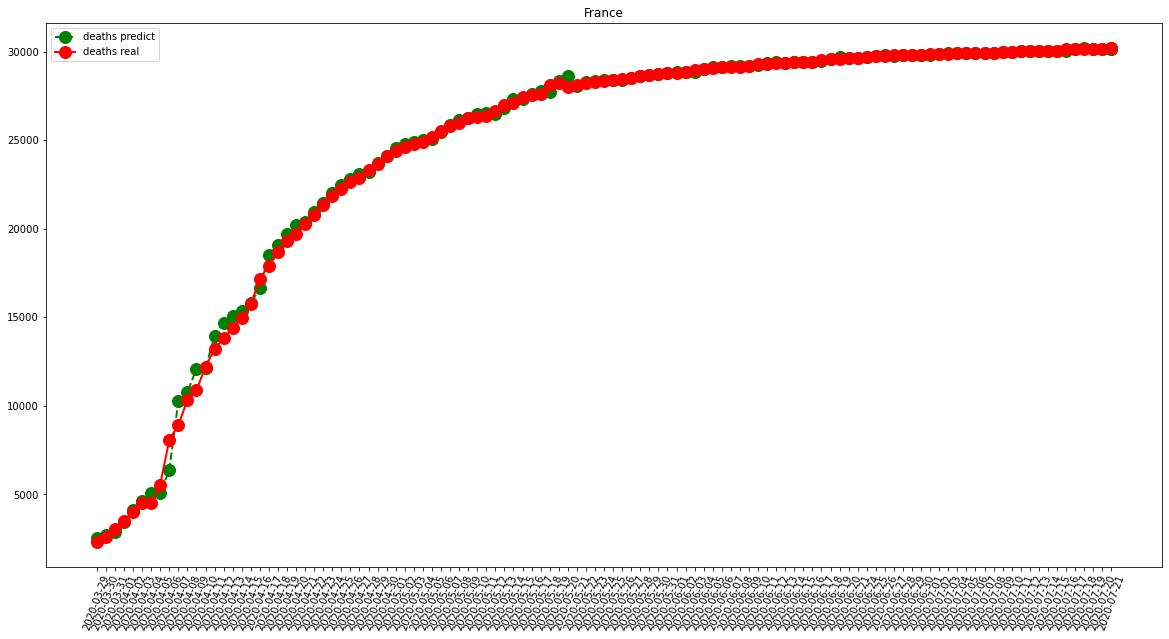

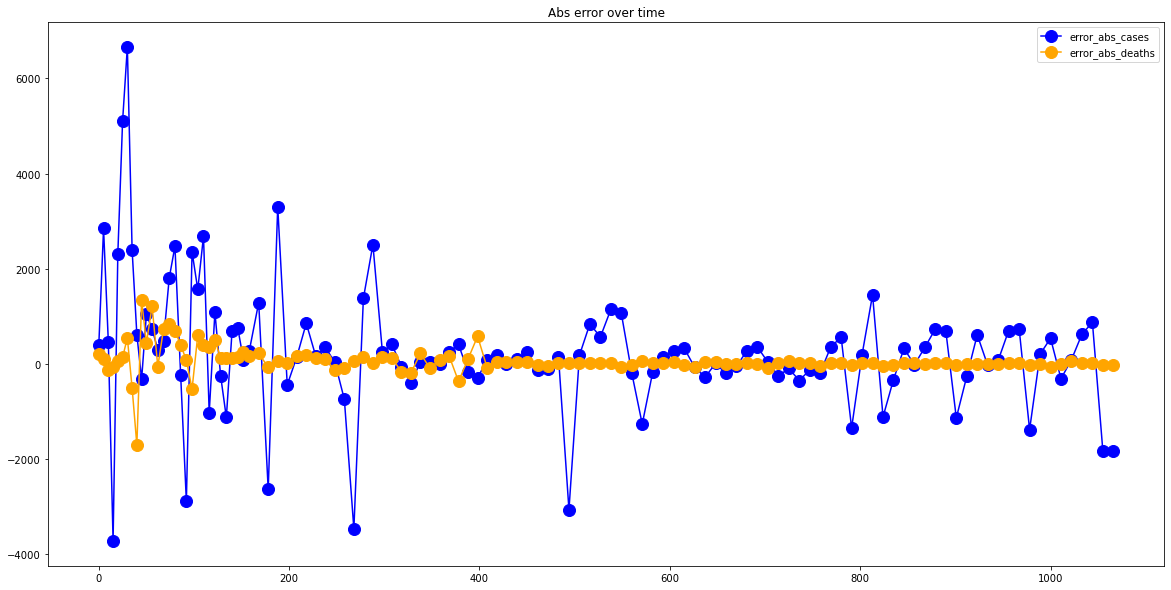

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  342.1842105263158
RMSE =  510.4658433166537
-- Italy performances for deaths --
MAE =  88.54385964912281
RMSE =  277.1224632705238


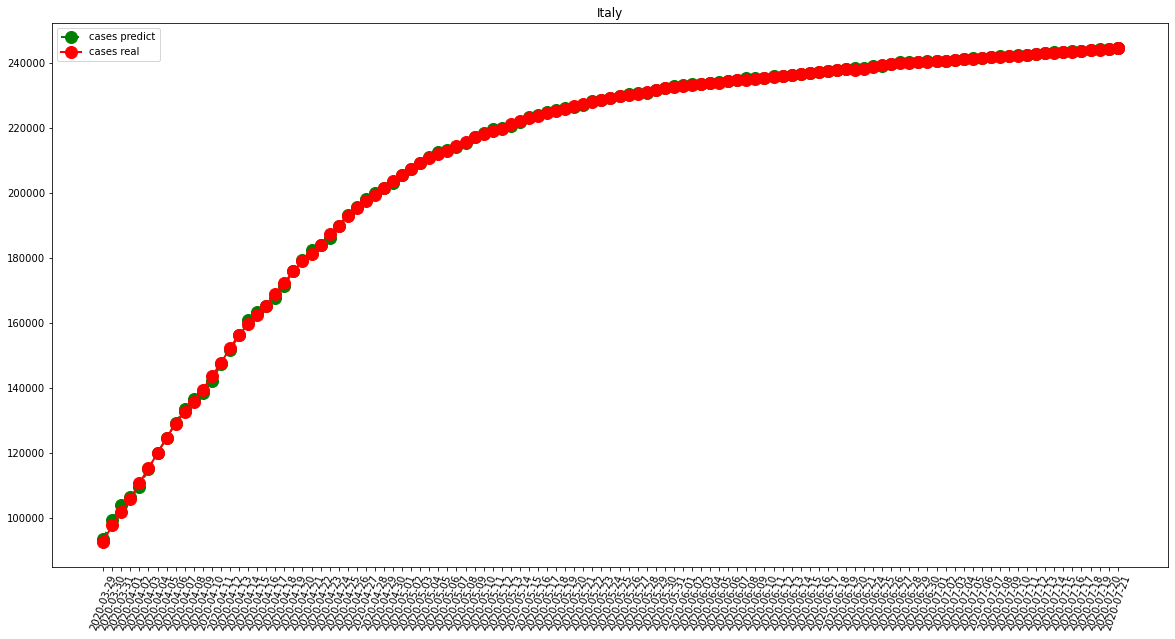

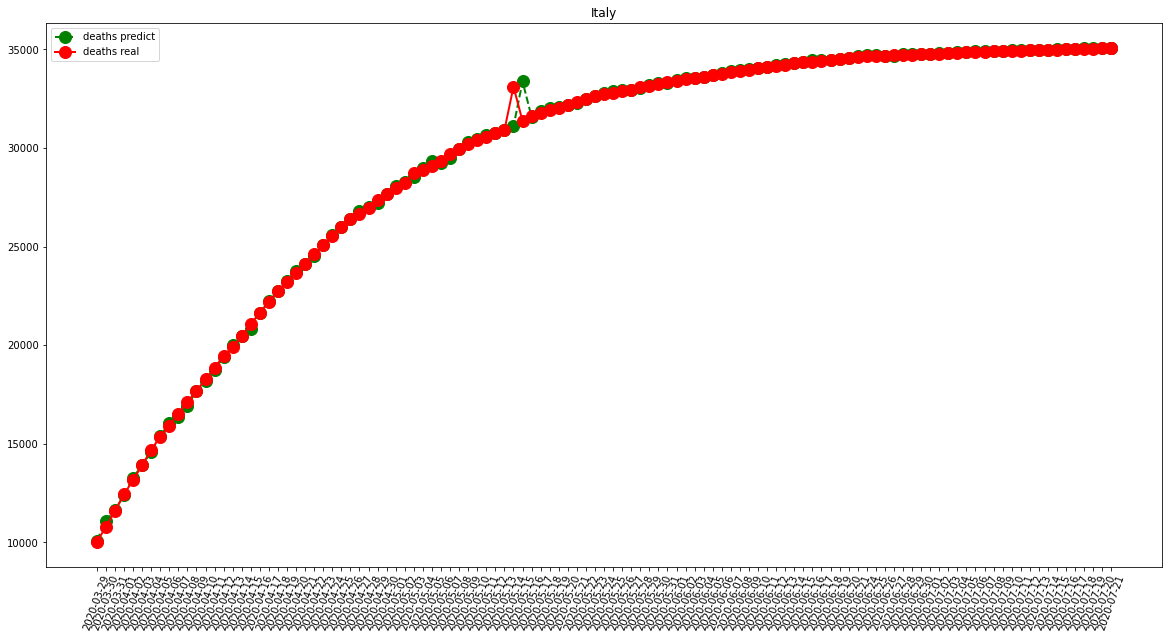

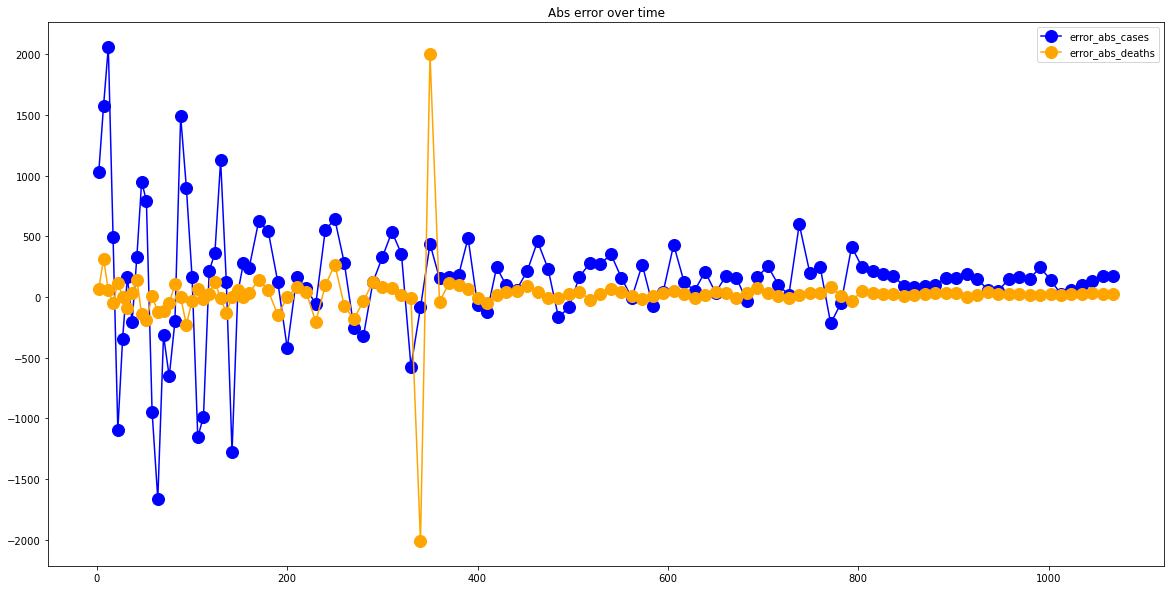

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  915.7894736842105
RMSE =  2031.699426933893
-- Spain performances for deaths --
MAE =  160.640350877193
RMSE =  380.16973356093126


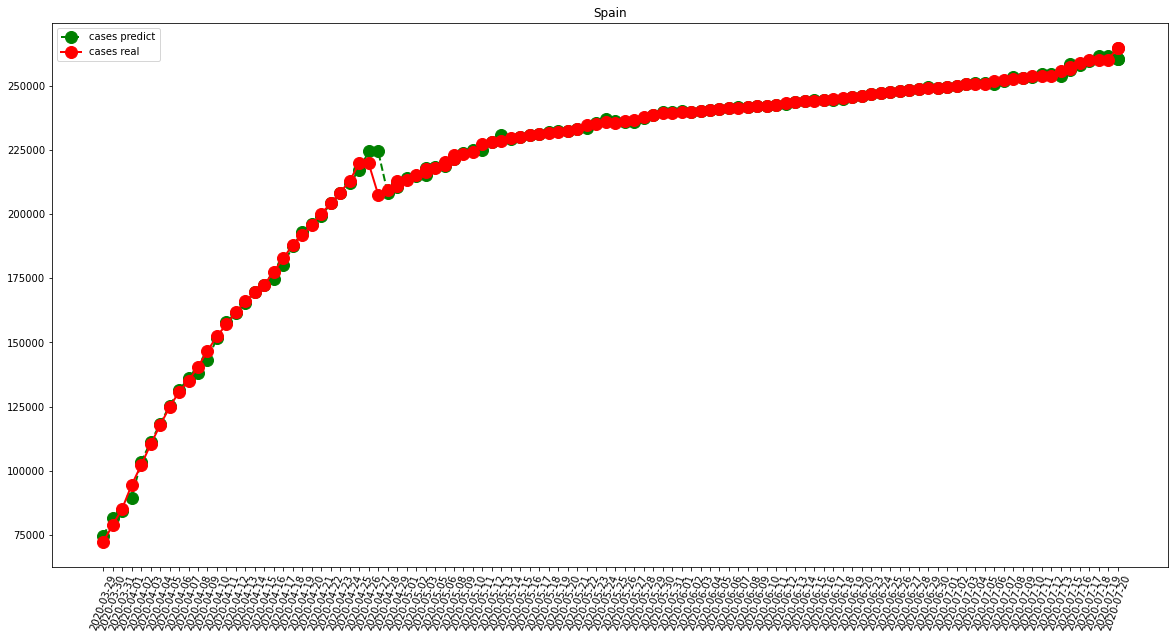

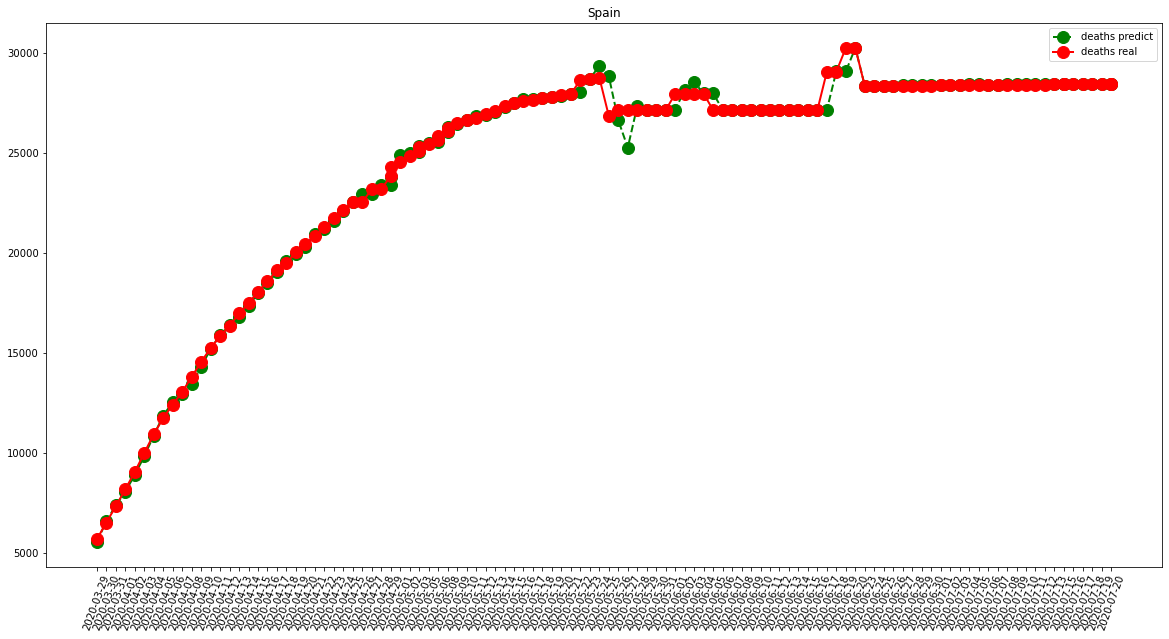

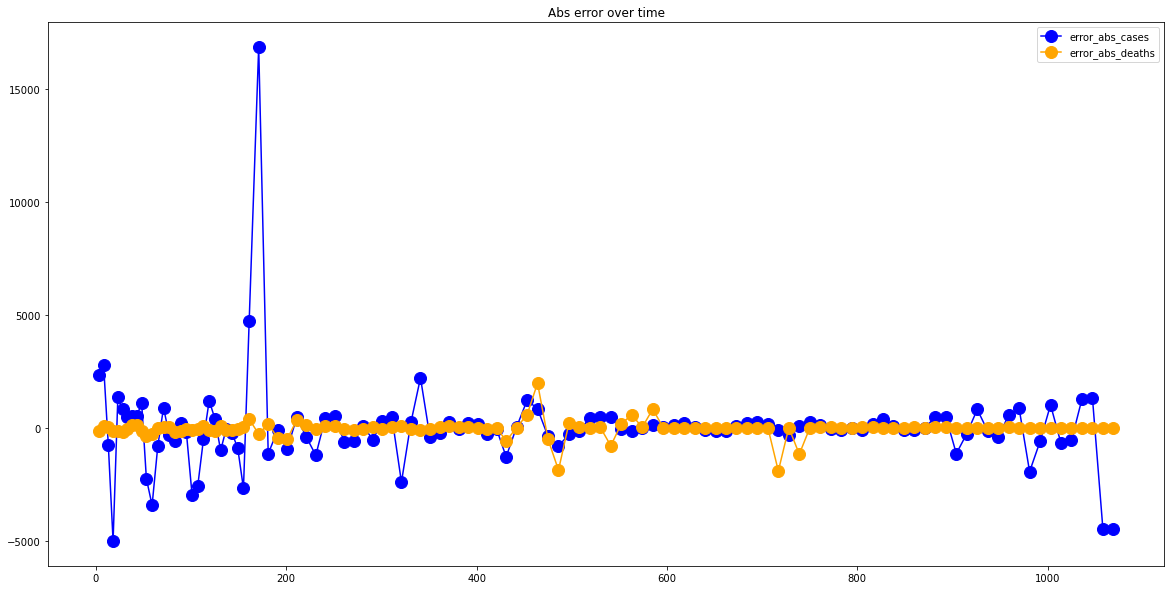

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5483.815789473684
RMSE =  7438.29324827735
-- United States performances for deaths --
MAE =  512.719298245614
RMSE =  744.8454802666686


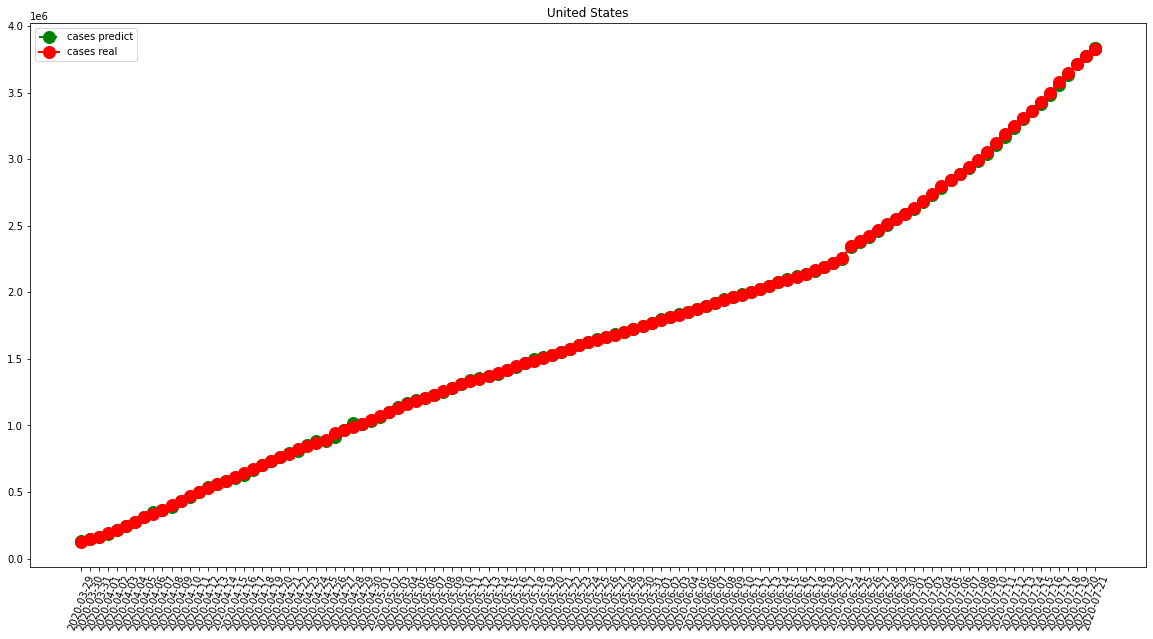

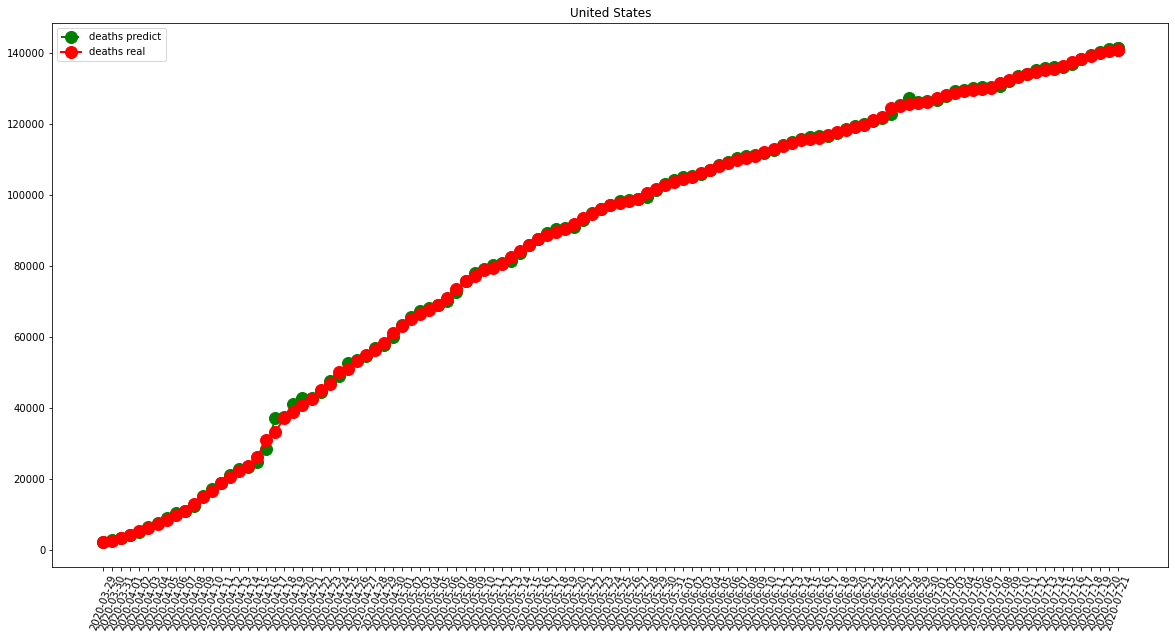

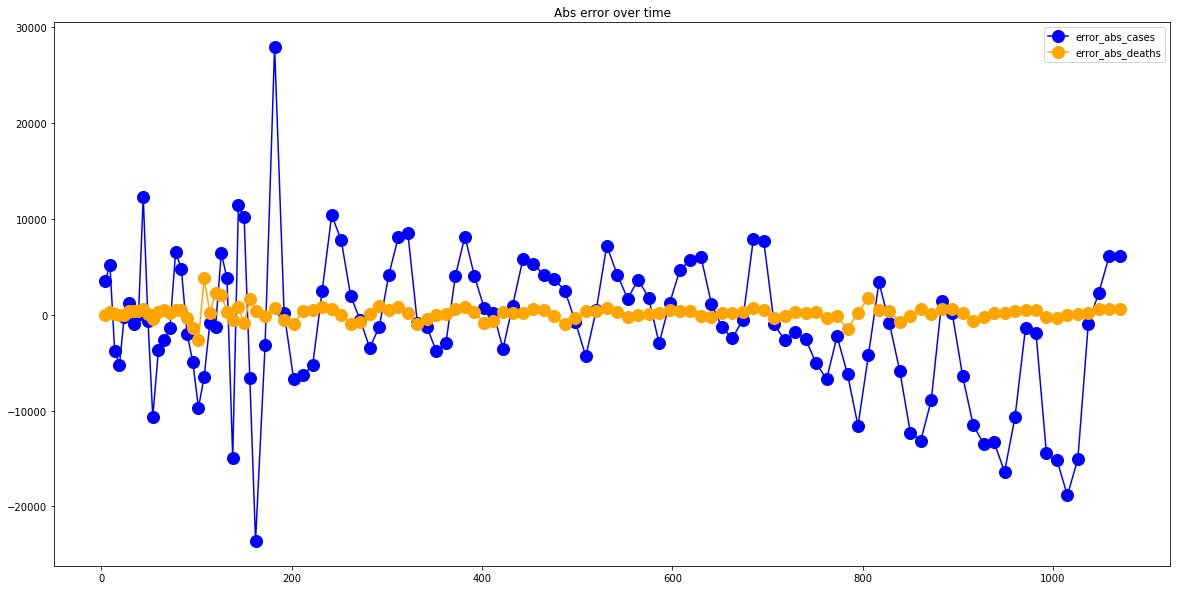

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  80.95614035087719
RMSE =  110.74884657432717
-- China performances for deaths --
MAE =  34.75438596491228
RMSE =  147.02864024614925


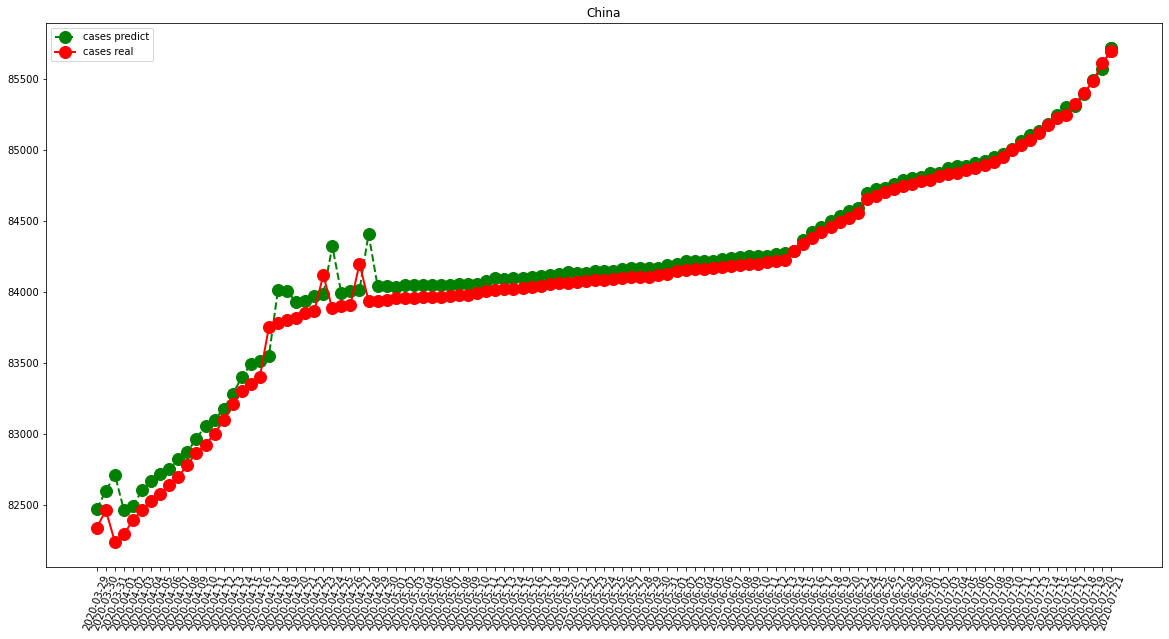

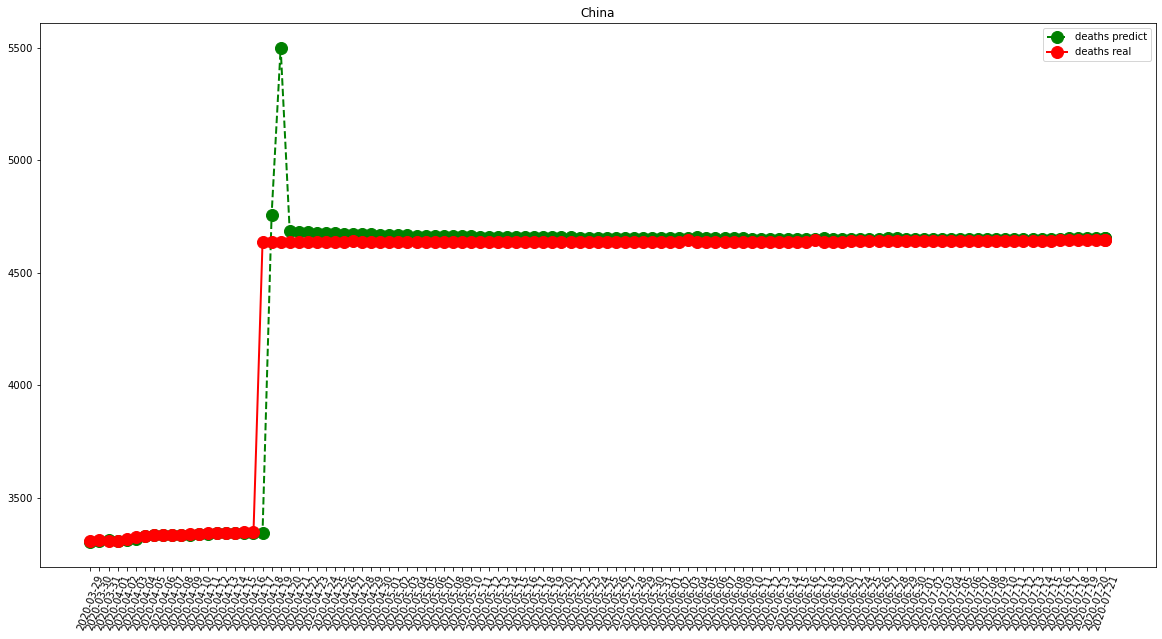

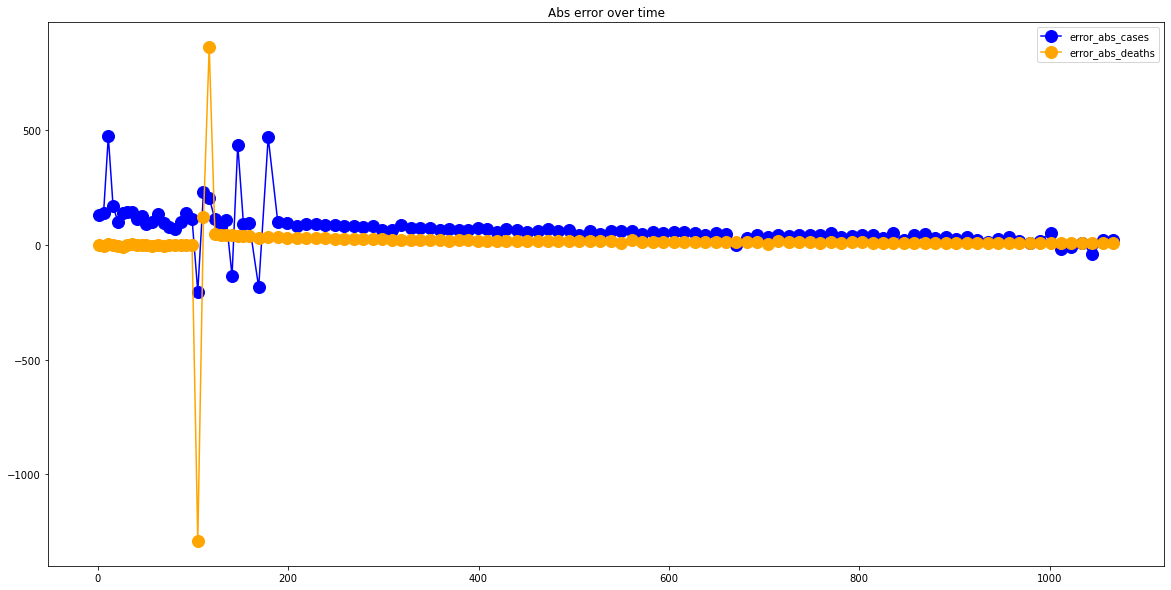

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1395.7558139534883
RMSE =  4499.382250880101
-- United Kingdom performances for deaths --
MAE =  217.01162790697674
RMSE =  528.7041310029031


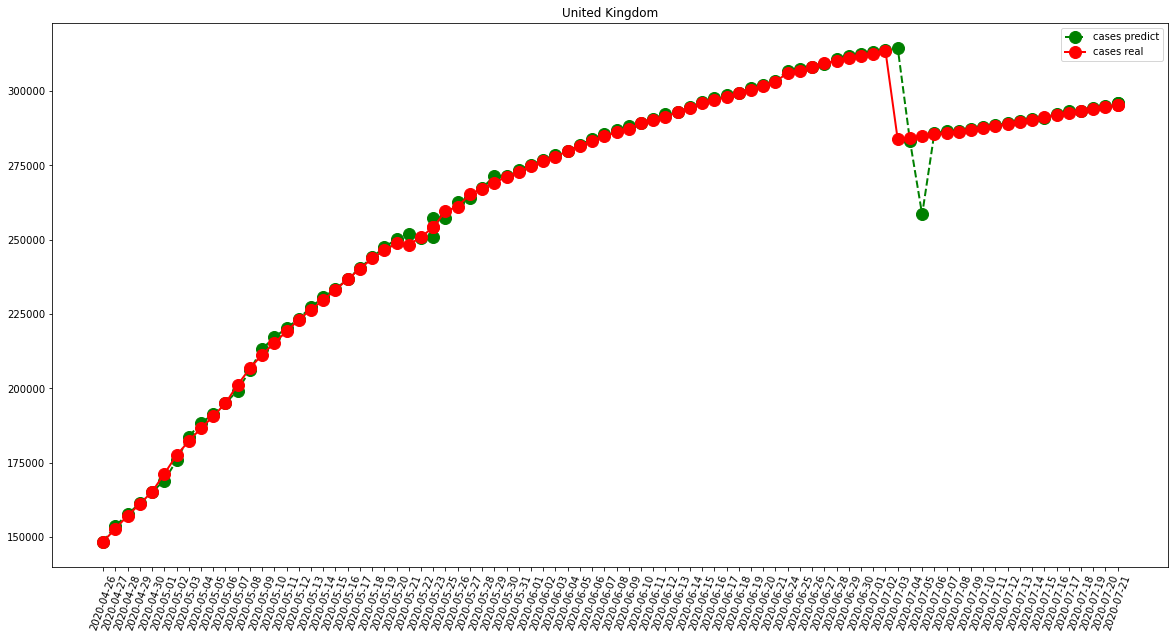

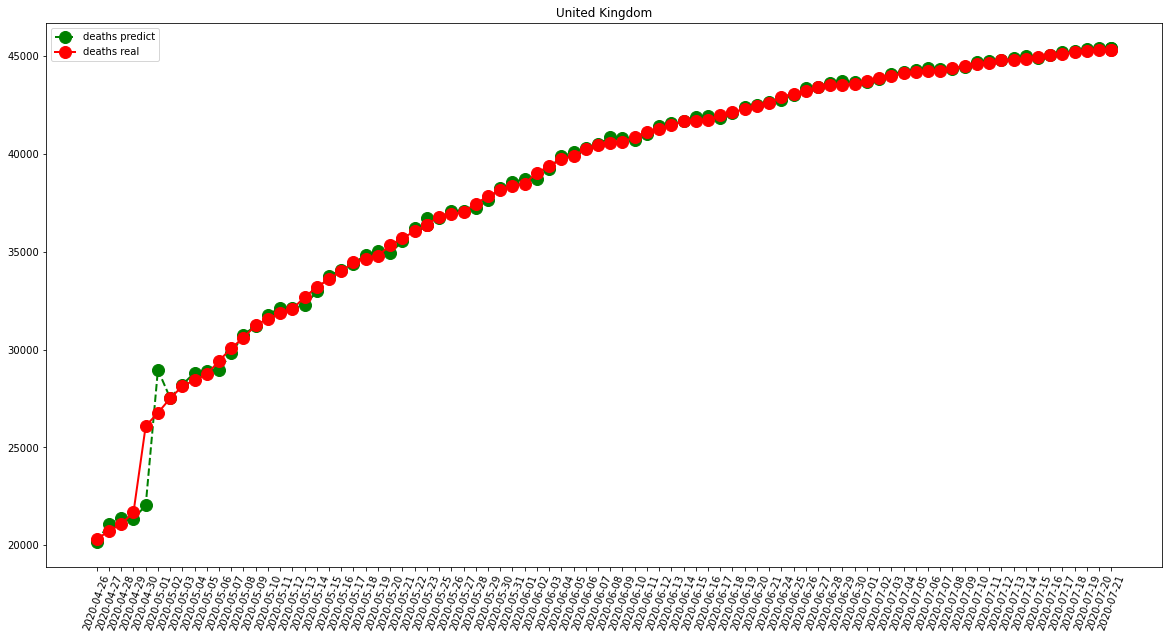

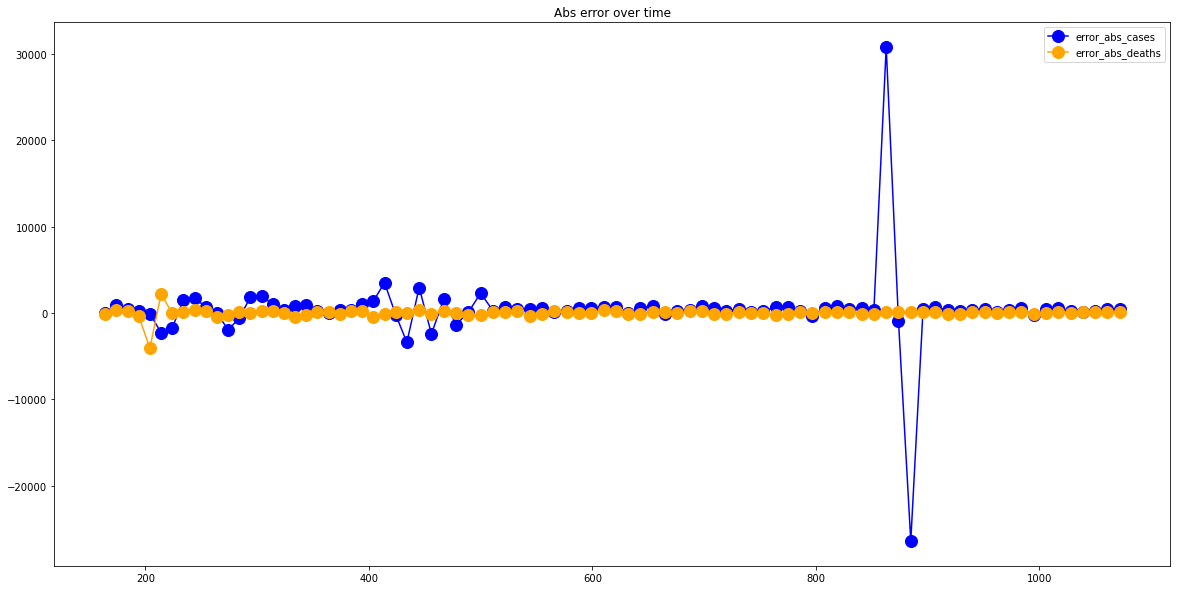

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  297.1162790697674
RMSE =  415.0993716835681
-- Germany performances for deaths --
MAE =  27.41860465116279
RMSE =  47.06378650300037


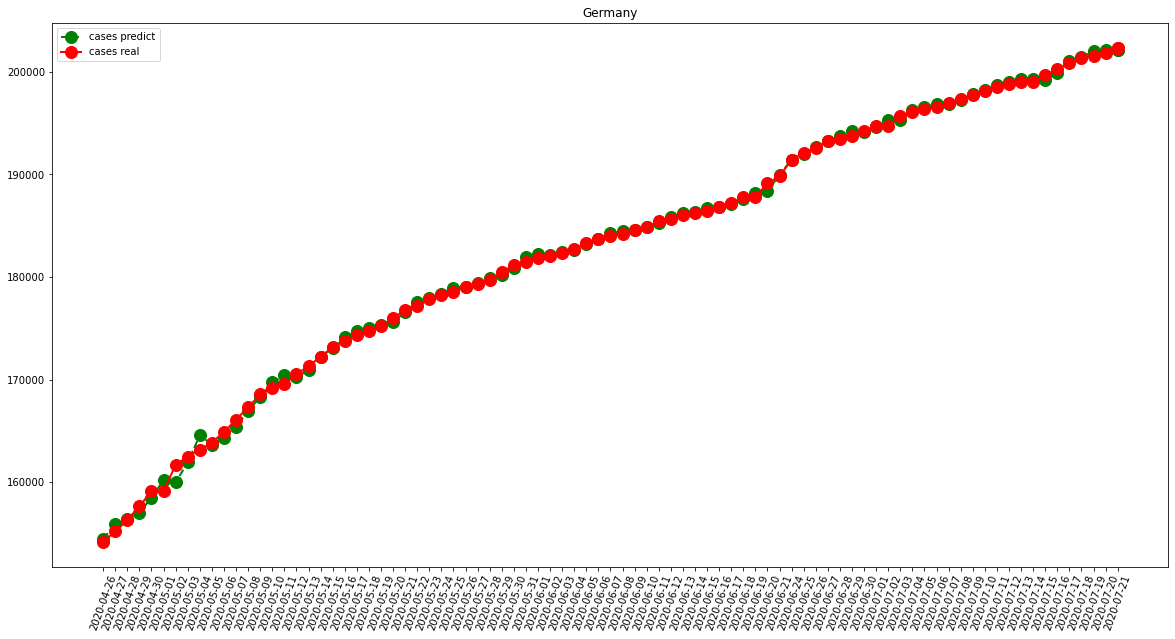

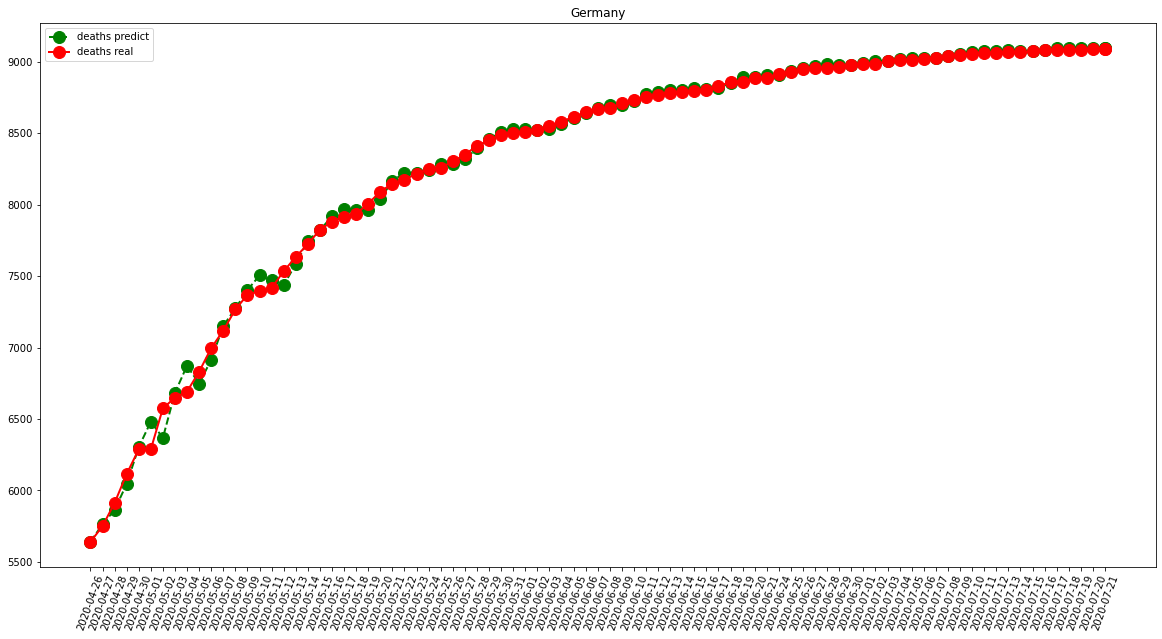

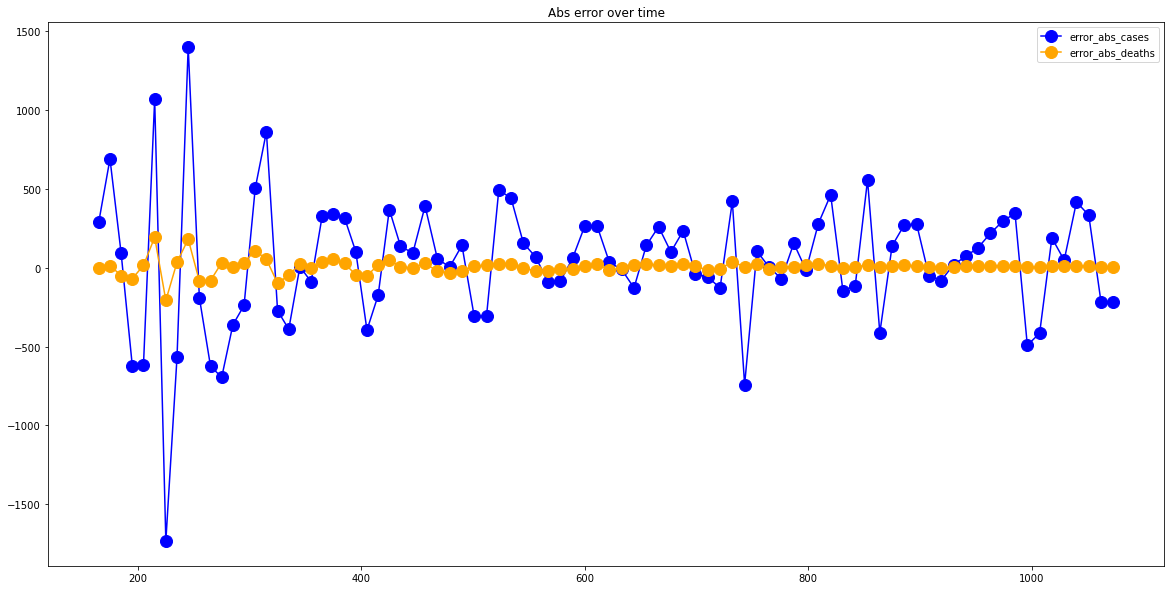

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  415.9767441860465
RMSE =  542.7237508783284
-- Iran performances for deaths --
MAE =  19.813953488372093
RMSE =  30.12802141559589


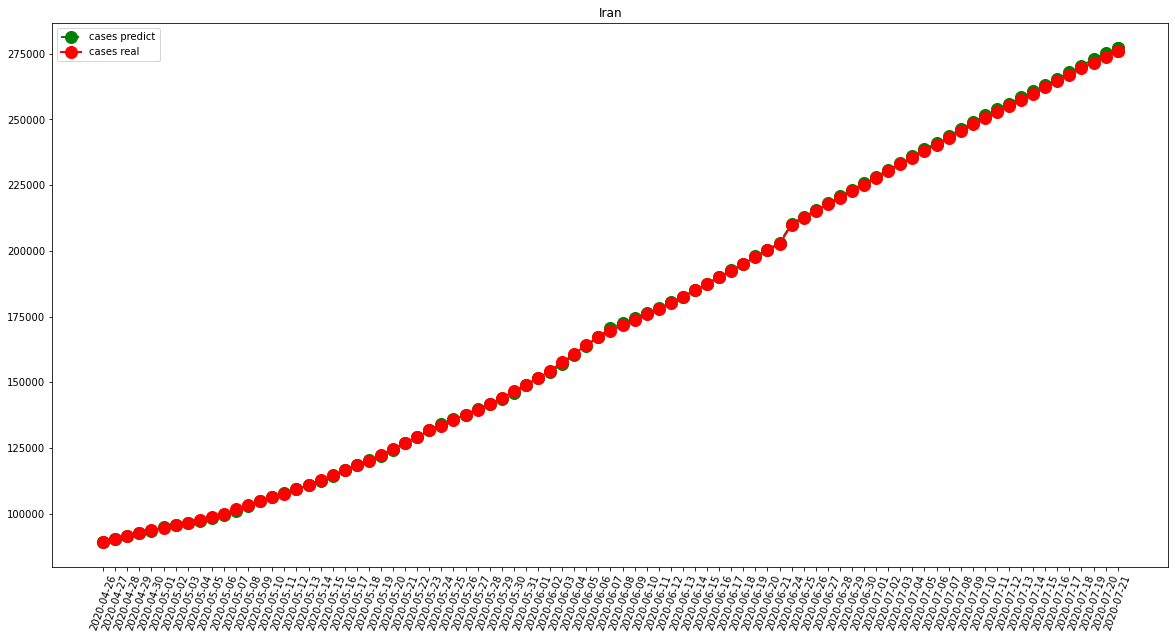

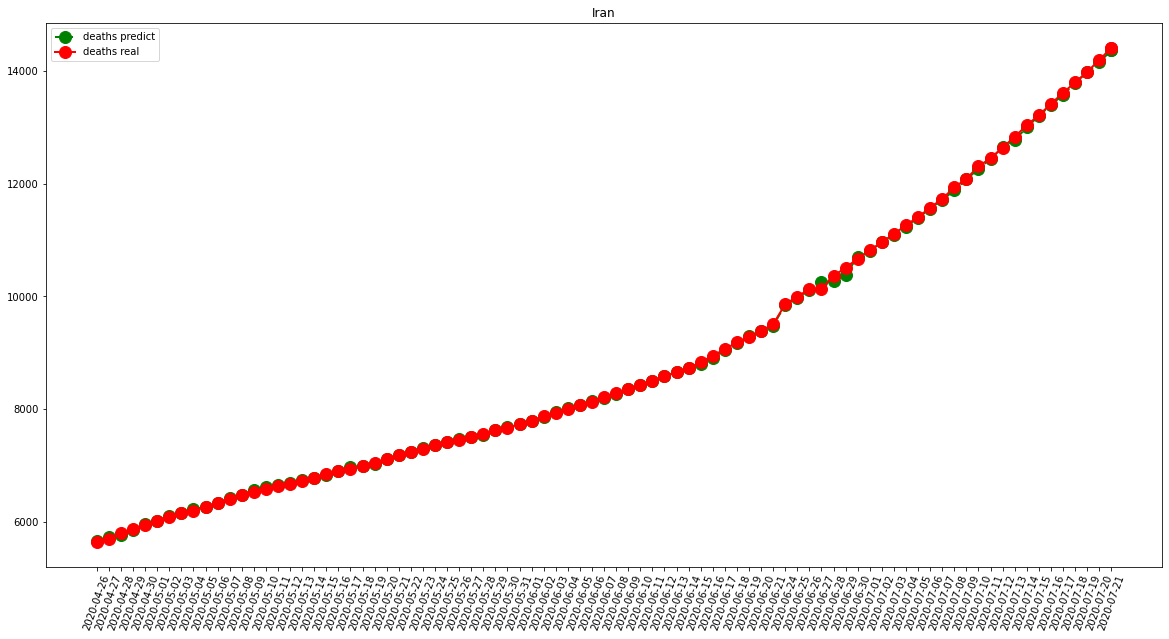

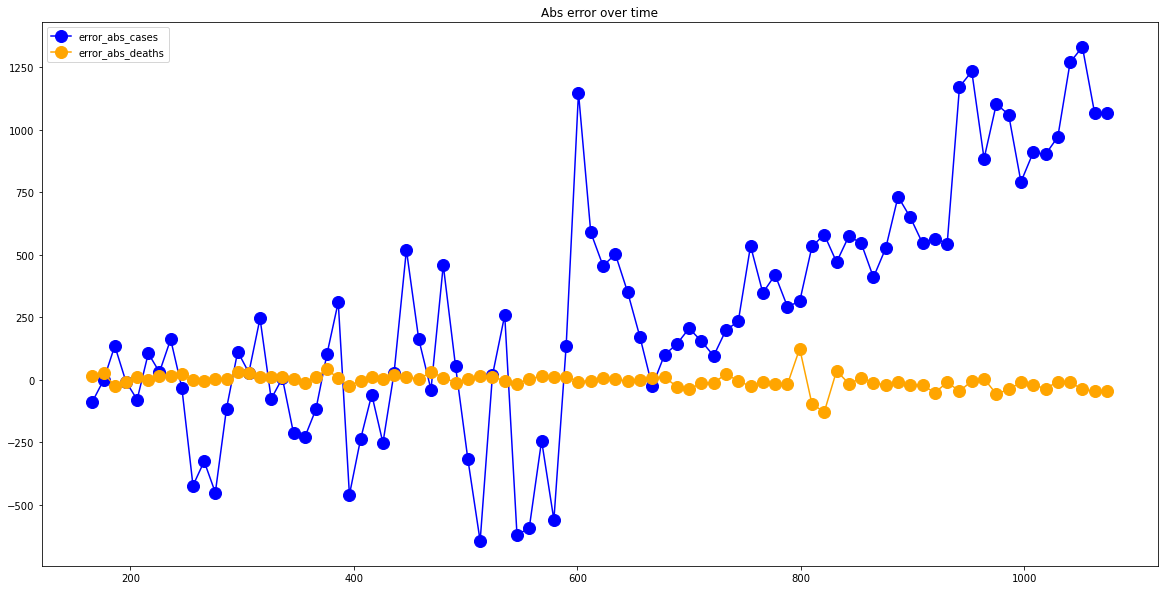

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  221.36046511627907
RMSE =  370.47061522364504
-- Turkey performances for deaths --
MAE =  21.72093023255814
RMSE =  109.45754194376966


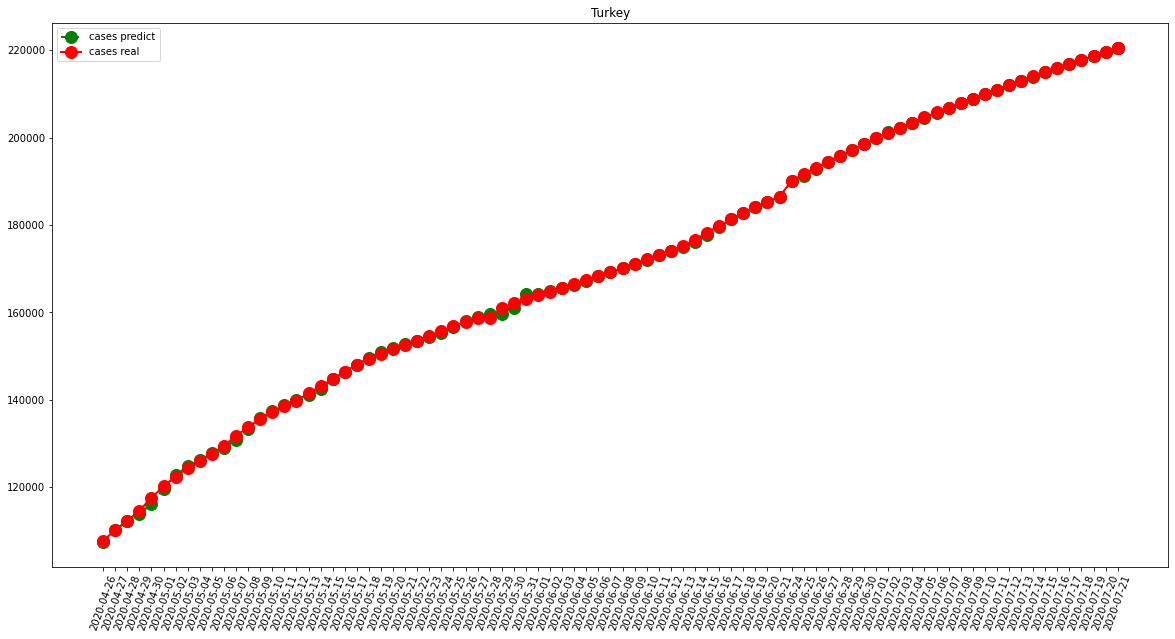

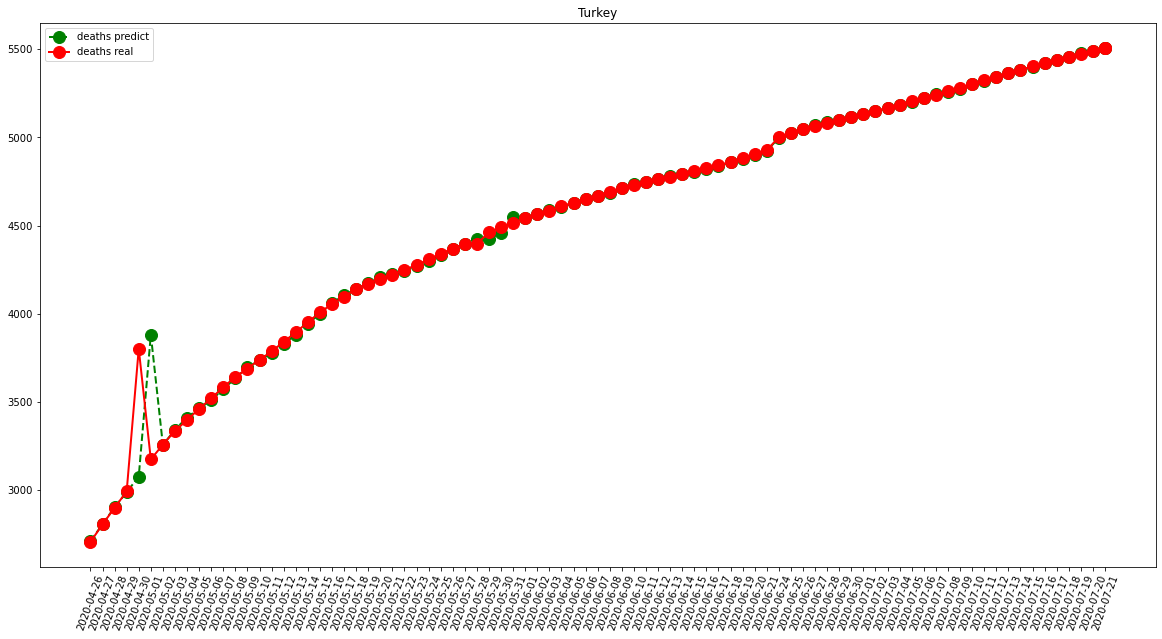

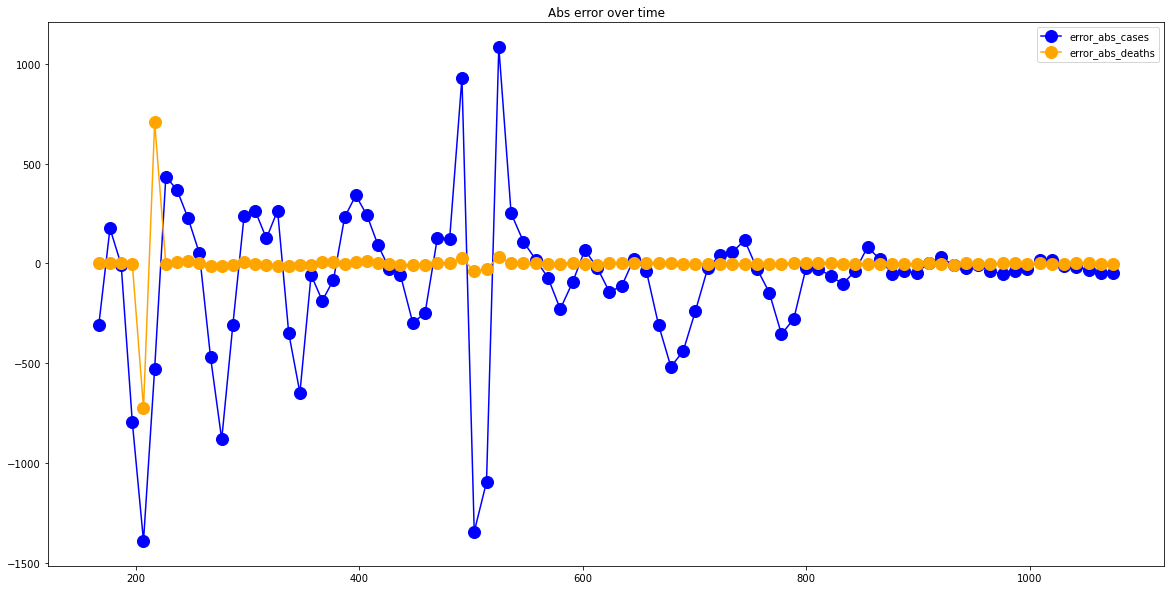

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  10691.203389830509
RMSE =  13910.289662387531
-- Brazil performances for deaths --
MAE =  386.23728813559325
RMSE =  473.27126990263656


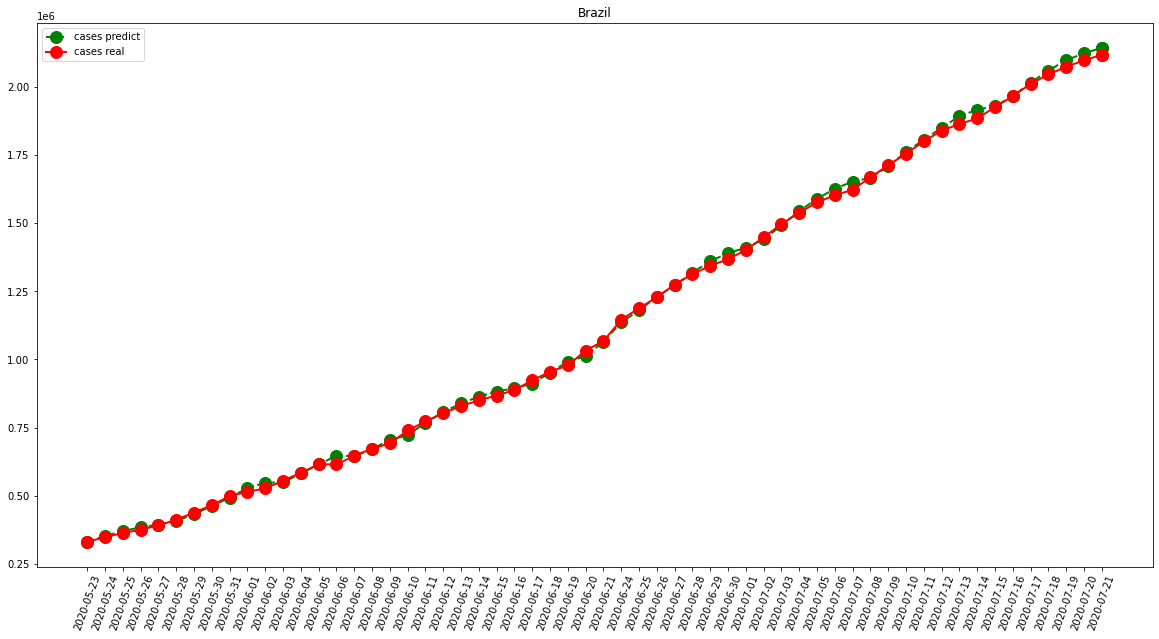

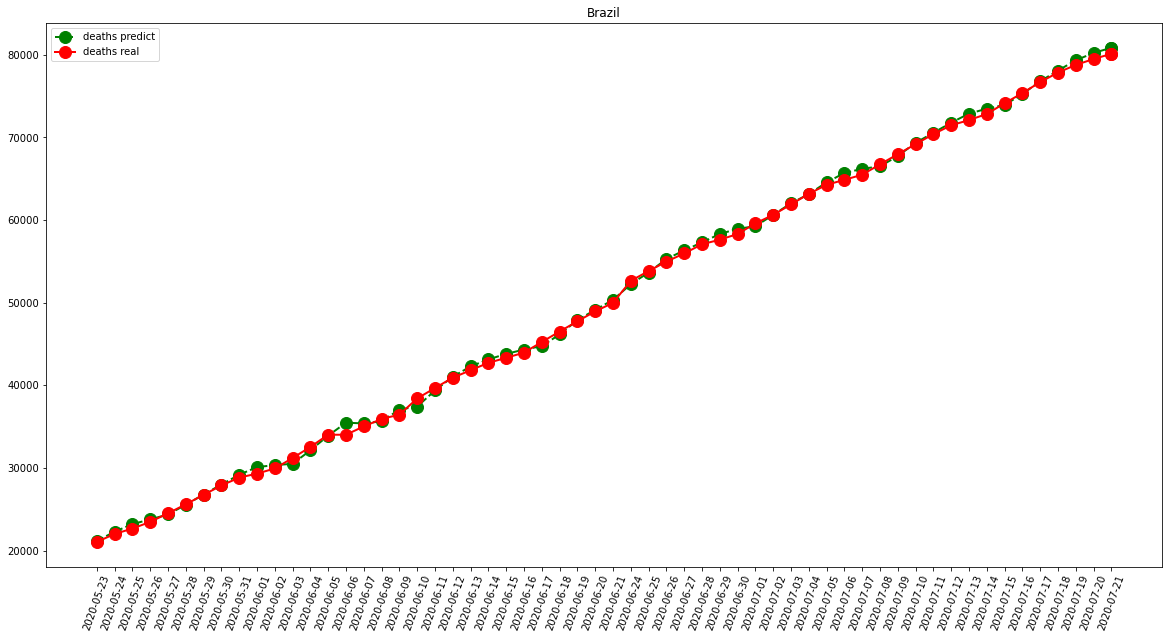

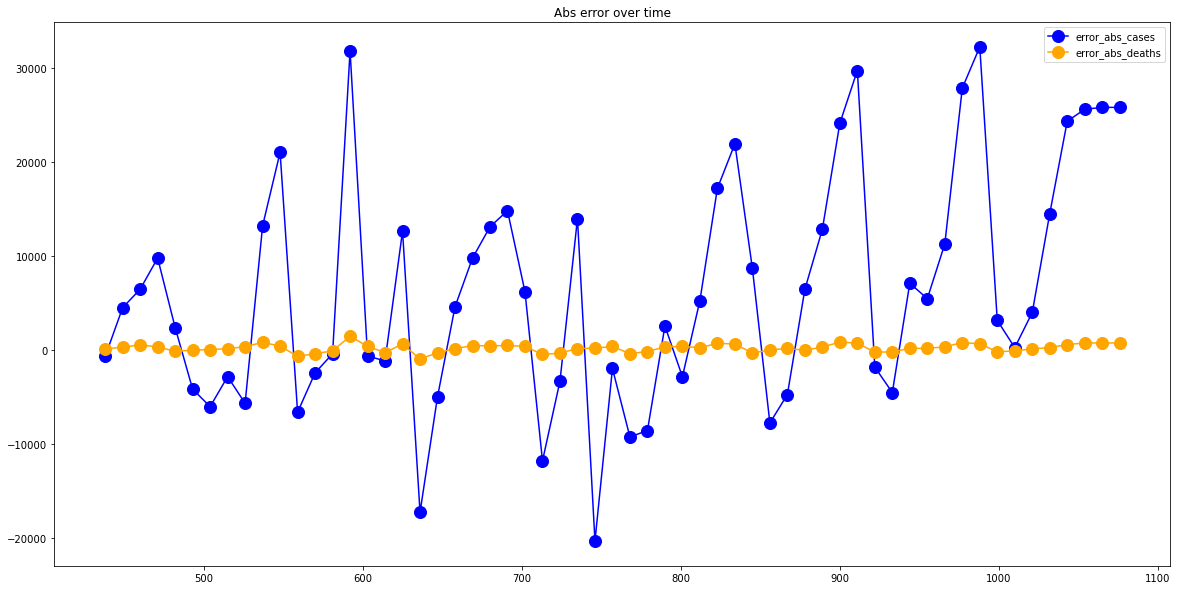

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)